# 酒店预订需求数据分析  

In [1]:
# 导包

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [2]:
# 查看数据
df = pd.read_csv('../input/hotel-booking-demand/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


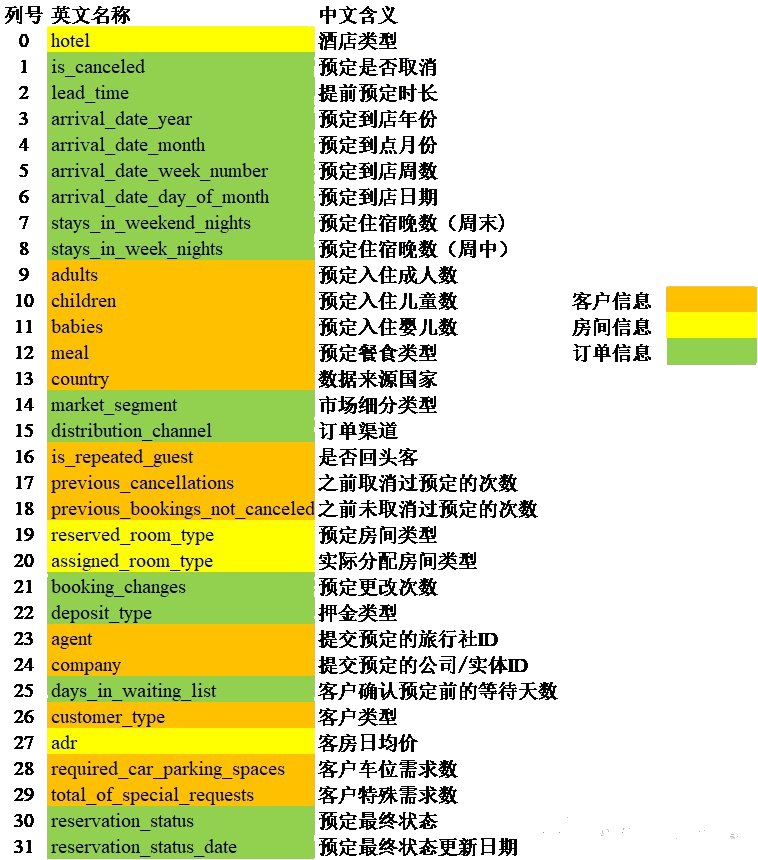

In [3]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


可以看出数据一共119390行，

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# 数据清洗
## 缺失值处理

In [5]:
# 统计缺失值
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


可见，共有四列出现缺失值，根据实际情况，比较合理的处理方案是：

1. children和country列由于缺失数目较小，采用对应列众数进行填充；
2. agent列缺失数目较多，将缺失值单独作为新类别，标记为0；
3. company列几乎全为缺失值，不能提供足够信息，删除此列。

In [6]:
df.children.fillna(df.children.mode()[0],inplace = True)    # df.children.mode()[0]返回的就是这一列的出现数字最多的数字
df.country.fillna(df.country.mode()[0],inplace = True)
df.agent.fillna(0,inplace  = True)                 # agent列的数据使用0填充
df.drop('company',inplace = True, axis  = 1)      # company的缺失值太多，直接删除。

## 异常值处理
可以看出数据集中有一些入住总人数为0或者入住总天数为0的异常数据，对于这些数据需要处理，同时，在Meal列中的Undefind和SC均表示未预定食物，属于同一类别。

In [7]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)     #这三列都是空，也就表明入住的总人数为0
df[filter]    # 打印入住总人数为0的所有行。

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [8]:
df = df[~filter]   # 利用~，直接过滤掉那些入住总人数为0的行
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [9]:
# 入住人数为0 这是另外一种处理办法，就是利用pandas对列进行处理
# zero_guest=df[df[['adults', 'children', 'babies']].sum(axis=1)==0]      #axis = 1沿着水平方向，计算这三列的和，如果全是0，那就是入住的总人数为0
# df.drop(zero_guest.index, inplace=True)     # 把入住总人数为0的行删除。

# 入住天数为0
zero_days = df[df[['stays_in_weekend_nights','stays_in_week_nights']].sum(axis=1) == 0]
df.drop(zero_days.index, inplace=True)    # 入住总天数为0的行删除。

# 食物类型Undefined/SC合并
df.meal.replace("Undefined", "SC", inplace=True)    # 用 SC全部替换Undefined
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_year               118565 non-null  int64  
 4   arrival_date_month              118565 non-null  object 
 5   arrival_date_week_number        118565 non-null  int64  
 6   arrival_date_day_of_month       118565 non-null  int64  
 7   stays_in_weekend_nights         118565 non-null  int64  
 8   stays_in_week_nights            118565 non-null  int64  
 9   adults                          118565 non-null  int64  
 10  children                        118565 non-null  float64
 11  babies                          118565 non-null  int64  
 12  meal            

处理完空缺值和异常值之后，数据还剩余118565行。

我们来查看一下是否还有空缺值。

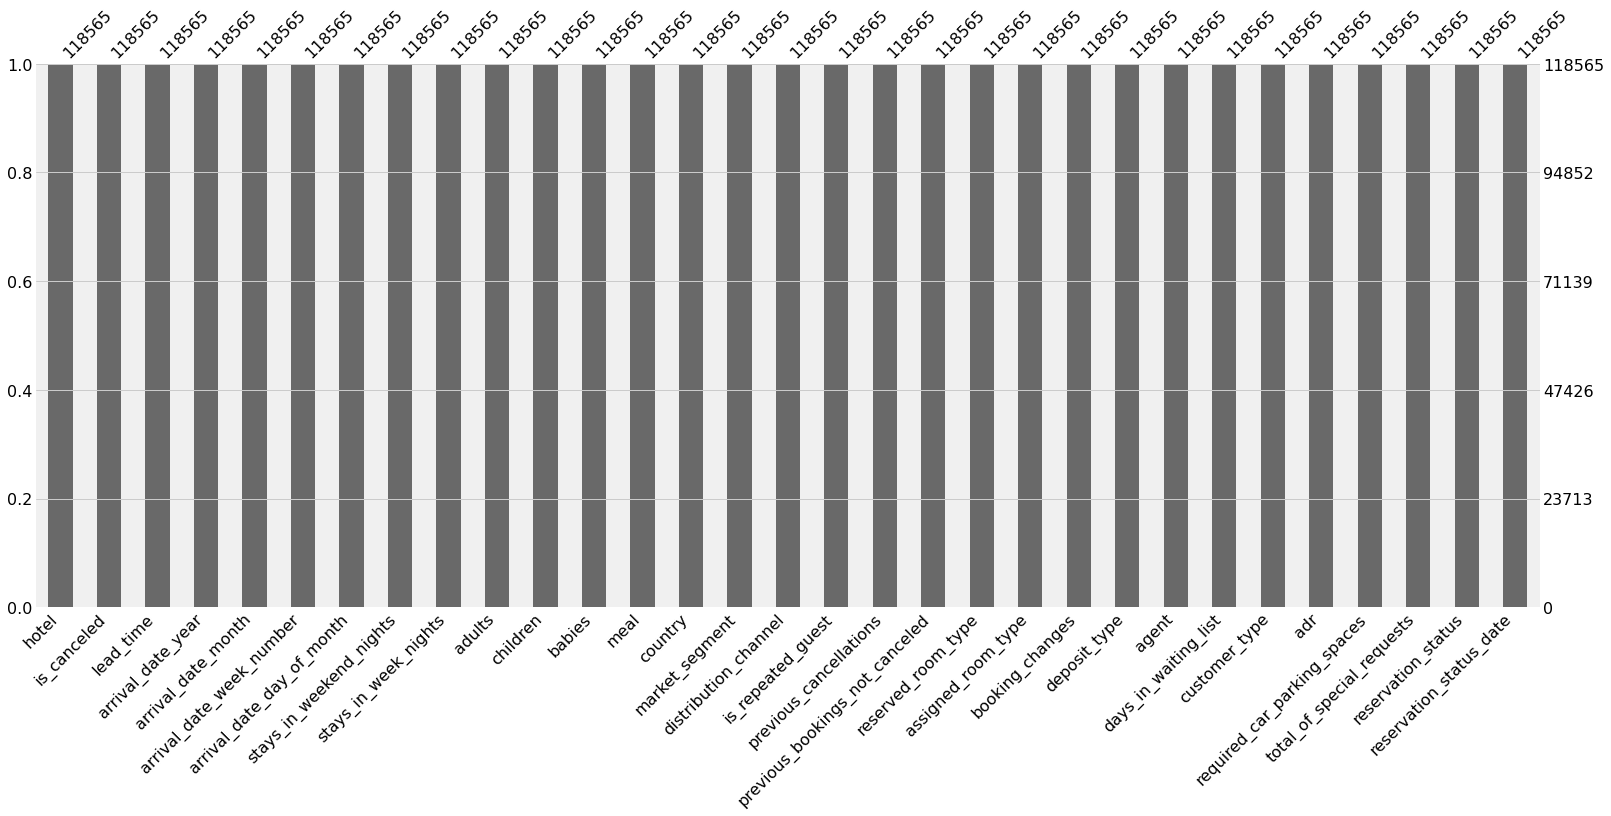

In [10]:
# 利用missingno这个包，有没有空缺值直接一目了然。
msno.bar(df)
plt.show()

# 数据探索EDA
## 来自哪里的客人最多？

In [11]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()  # reset_index(),使用原来的行索引作一列保留。
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,20865
1,GBR,9644
2,FRA,8457
3,ESP,6368
4,DEU,6067
...,...,...
160,MRT,1
161,NPL,1
162,SDN,1
163,PYF,1


In [12]:
basemap = folium.Map()    # 创建一张地图出来。
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

最多的乘客来自于Portual和欧洲的一些其他城市

## 每晚要花费多少钱？

In [13]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03


受到不同的酒店类型、以及餐饮类型、季节因素等原因，也会导致价格的变动非常大。

adr（客房日均价之间）受到预定的不同房间类型,reset Hotel(度假酒店)和 city Hotel(城市酒店) 以及标准差的影响。

In [14]:
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

可以看出不同的房间类型以及他们的标准差，可以影响到价格。

## 近些年来，每晚的价格变化是怎样的？

In [15]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]    # 拿出度假酒店的数据
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]        # 拿出城市酒店的数据

In [16]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()     # 按照预定到达月份分组，对客房日均价求均值
resort_hotel

,arrival_date_month,adr
0,April,76.467561
1,August,183.117465
2,December,70.223216
3,February,54.620795
4,January,49.584883
5,July,152.061469
6,June,109.370845
7,March,57.685069
8,May,77.824153
9,November,49.508451


In [17]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()   # 和上面做同样的处理。
city_hotel

,arrival_date_month,adr
0,April,112.242172
1,August,119.007207
2,December,89.038648
3,February,87.292563
4,January,82.920905
5,July,116.232264
6,June,118.145460
7,March,91.153812
8,May,121.628369
9,November,87.832797


In [18]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')    # 把这两列的数据合并起来。
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,76.467561,112.242172
1,August,183.117465,119.007207
2,December,70.223216,89.038648
3,February,54.620795,87.292563
4,January,49.584883,82.920905
5,July,152.061469,116.232264
6,June,109.370845,118.145460
7,March,57.685069,91.153812
8,May,77.824153,121.628369
9,November,49.508451,87.832797


我们发现，月份的那一列，并不是按照顺序的，如果后面做可视化的化，不是特别的直观

首先，我们得把月份这一列排好顺序

In [19]:
!pip install sort-dataframeby-monthorweek    # 使用pip指令，安装这两个包

!pip install sorted-months-weekdays

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3439 sha256=1e72a459b5ccda8bd4e0607fe778df7475a5ecbfb2422b4c1794dfd07bf596af
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3240 sha256=27b7ee4af25f972781000db815d8395228ead20662c9dfb152454c150c6c5c41
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [20]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [21]:
final_prices = sort_month(final_hotel, 'month')     # 按照列名对数据排好序。
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,49.584883,82.920905
1,February,54.620795,87.292563
2,March,57.685069,91.153812
3,April,76.467561,112.242172
4,May,77.824153,121.628369
5,June,109.370845,118.145460
6,July,152.061469,116.232264
7,August,183.117465,119.007207
8,September,96.785215,113.146428
9,October,62.799755,102.956652


In [22]:
plt.figure(figsize = (17, 8))           # 绘制成折线图

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1224x576 with 0 Axes>

从图中可以看出，在夏季的时候，度假酒店的价格明显的高于城市酒店，在春季和秋季，城市酒店的价格又低于度假酒店，比较合理

## 哪个月份最忙了？ 也就是统计每个月的订单数量。

In [23]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()   #data_resort是前面计算出的度假酒店的数据
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,3223
1,July,3097
2,March,2543
3,October,2533
4,April,2530
5,May,2497
6,February,2288
7,September,2094
8,June,2011
9,December,1962


In [24]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,5352
1,July,4753
2,May,4532
3,June,4348
4,October,4286
5,September,4269
6,March,4027
7,April,4000
8,February,3024
9,November,2649


In [25]:
final_guests = resort_guests.merge(city_guests,on='month')     # 合并起来
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

,month,no of guests in resort,no of guest in city hotel
0,August,3223,5352
1,July,3097,4753
2,March,2543,4027
3,October,2533,4286
4,April,2530,4000
5,May,2497,4532
6,February,2288,3024
7,September,2094,4269
8,June,2011,4348
9,December,1962,2360


In [26]:
final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,1835,2233
1,February,2288,3024
2,March,2543,4027
3,April,2530,4000
4,May,2497,4532
5,June,2011,4348
6,July,3097,4753
7,August,3223,5352
8,September,2094,4269
9,October,2533,4286


In [27]:
px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')

从图中可以看出，城市酒店春季和秋季顾客比较多，从上面的分析还可以看出来，在这个时候价格也比较高。

度假酒店在在夏季人比较多，即使这个时候价格也是比较贵

但是总体来看，城市酒店的顾客数量要多余度假酒店

## 人们在酒店里住多久？

In [28]:
filter = df['is_canceled'] == 0     # 还是要排除掉那些取消订单的顾客。
data = df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [29]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']      # 预订住宿晚数 = 周末+非周末
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03,2


In [30]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,1,City Hotel,9155
1,1,Resort Hotel,6579
2,2,City Hotel,10983
3,2,Resort Hotel,4488
4,3,City Hotel,11889
5,3,Resort Hotel,3828
6,4,City Hotel,7694
7,4,Resort Hotel,3321
8,5,City Hotel,3210
9,5,Resort Hotel,1899


In [31]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

问题1：哪些房型的入住率最高，找出最受欢迎的房型，优化酒店房型分配

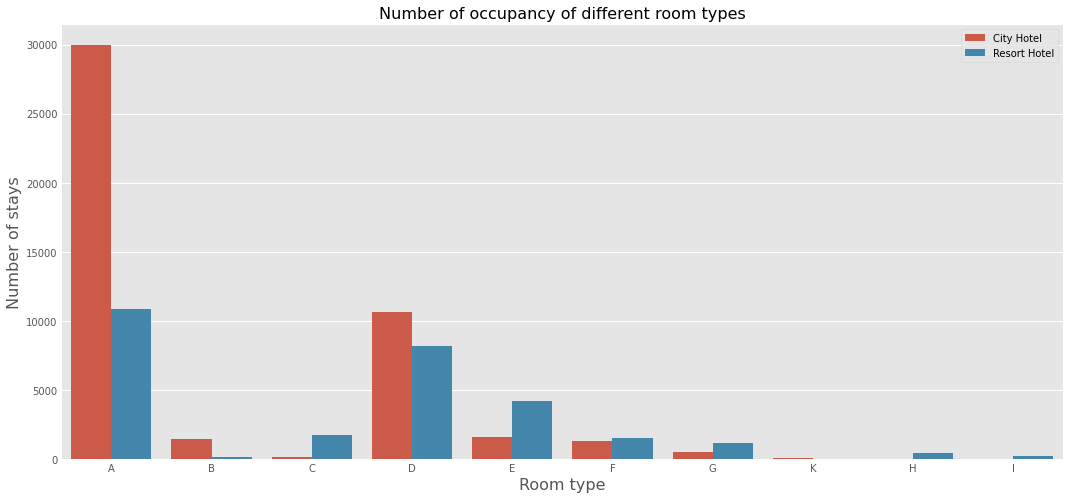

In [82]:

#返回酒店列的统计值
data["hotel"].value_counts()
#划分城市酒店及度假酒店的数据集
rh = data[(data["hotel"]=="Resort Hotel") & (data["is_canceled"]==0)]
ch = data[(data["hotel"]=="City Hotel") & (data["is_canceled"]==0)]

#统计不同酒店、不同房型的入住情况
rh_room = rh.groupby("assigned_room_type")["hotel"].count().reset_index().rename(columns={"hotel":"room_counts"})
ch_room = ch.groupby("assigned_room_type")["hotel"].count().reset_index().rename(columns={"hotel":"room_counts"})
#酒店标识
rh_room["hotel"] = "Resort Hotel"
ch_room["hotel"] = "City Hotel"
#合并
all_room = pd.concat([ch_room,rh_room],ignore_index=True)


plt.figure(figsize=(16,8))
sns.barplot(x="assigned_room_type",y="room_counts",hue="hotel",data=all_room,hue_order=["City Hotel","Resort Hotel"])
plt.title("Number of occupancy of different room types",fontsize=16)
plt.xlabel("Room type",fontsize=16)
plt.ylabel("Number of stays",fontsize=16)
plt.legend(loc="upper right")
plt.show()

酒店的A和D房型的预订入住量均明显高于其他房型，是后续主推的房型，也是主要的房型优化对象；其余B、C、F、G、H、L房型均没有太多的预订入住量，可以适当调整房型占比，最大化入住率；另度假酒店E房型的的预订入住量数量也不少，可能是酒店的高级套房（带观景台）

结合时间序列，划分为四季，统计分析四季不同酒店类型的入住量变化情况

<Figure size 2160x2160 with 0 Axes>

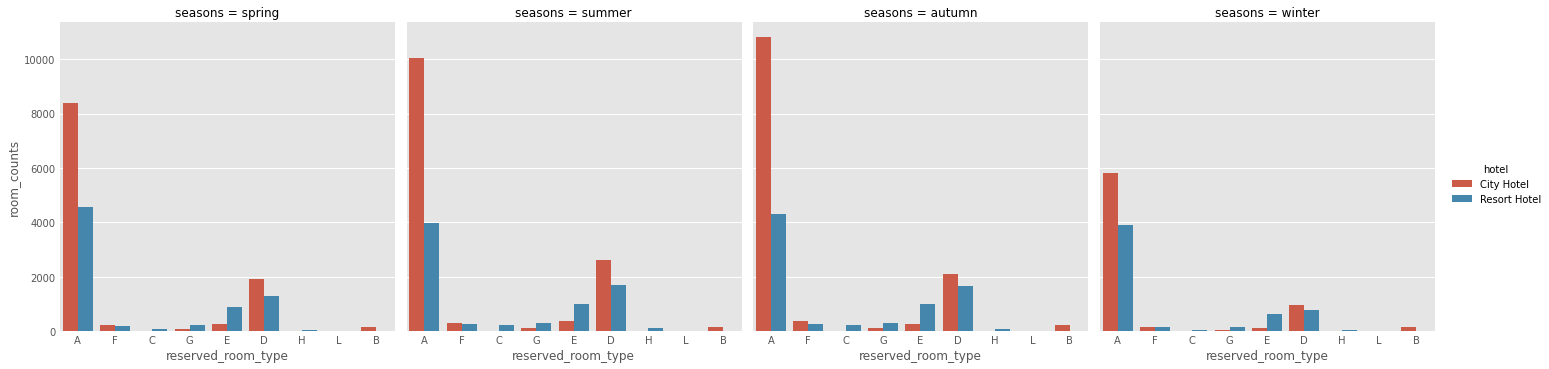

In [85]:
#对月份进行映射，得到对应的季节
season = {"January":"winter","February":"spring","March":"spring","April":"spring","May":"summer","June":"summer","July":"summer","August":"autumn","September":"autumn","October":"autumn","November":"winter","December":"winter"}
rh["seasons"] = rh["arrival_date_month"].map(season)
ch["seasons"] = ch["arrival_date_month"].map(season)
#结合时序分析不同酒店、房型在四季的入住情况
rh_room_season = rh.groupby(["reserved_room_type","seasons"])["hotel"].count().reset_index().rename(columns={"hotel":"room_counts"})
ch_room_season = ch.groupby(["reserved_room_type","seasons"])["hotel"].count().reset_index().rename(columns={"hotel":"room_counts"})
rh_room_season["hotel"] = "Resort Hotel"
ch_room_season["hotel"] = "City Hotel"
all_room_season = pd.concat([ch_room_season,rh_room_season],axis=0,ignore_index=True).sort_values("seasons")

plt.figure(figsize=(30,30))
sns.catplot(x="reserved_room_type",y="room_counts",hue="hotel",col="seasons",data=all_room_season,kind="bar",col_order=["spring","summer","autumn","winter"],hue_order=["City Hotel","Resort Hotel"])

城市酒店的随着季节变化比较明显，春夏秋三季的入住量不断攀升，在夏季达到高峰，而在冬季的客流量则有所缩减；度假酒店的话，则春夏秋季基本保持平稳，凛冬客流减少

## 客户类型分布

<AxesSubplot:title={'center':'Customer type order quantity'}, xlabel='customer_type'>

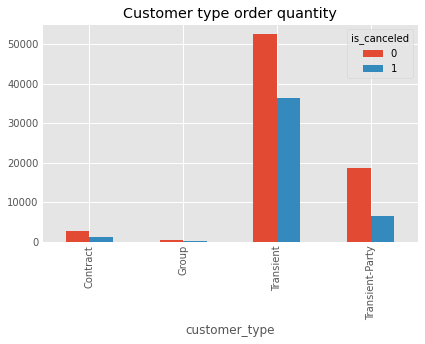

In [119]:
# 各客户类型的订单量
grouped_df_ct = df.pivot_table(values='hotel',index='customer_type',columns='is_canceled',aggfunc='count')
# 可视化
grouped_df_ct.plot(kind='bar',title='Customer type order quantity')


根据客户类型分布可知，酒店订单主要来自过往旅客，高于其他客户。此外，跟团旅客取消订单可能性很小。



##  客户历史取消率

In [120]:
# 复制df_copy表
df_copy_pb = df.copy()
#计算历史订单取消率，创建新列'canceled_rate'
df_copy_pb['canceled_rate'] = (df_copy_pb['previous_cancellations']/(df_copy_pb['previous_bookings_not_canceled']\
                                                                     +df_copy_pb['previous_cancellations'])).replace(np.nan,0)


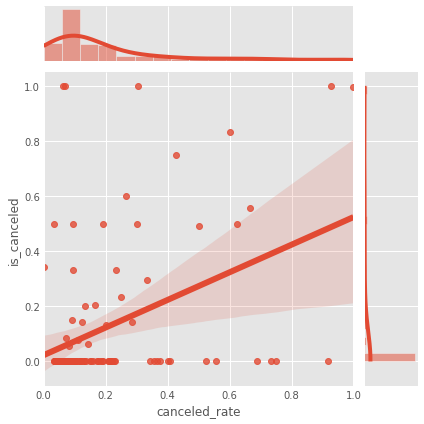

In [121]:
# 历史订单取消率分布
grouped_df_copy_pb = df_copy_pb.pivot_table(values='is_canceled',index='canceled_rate', aggfunc='mean')
# 可视化
sns.jointplot(x=grouped_df_copy_pb.index, y=grouped_df_copy_pb.is_canceled, kind='reg')


根据上图可知，用户d 历史订单取消率与是否取消酒店订单有一定的相关性。

## 订单预订时长和确定时长分布

<AxesSubplot:title={'center':'Order cancellation rate corresponding to booking duration'}, xlabel='lead_time'>

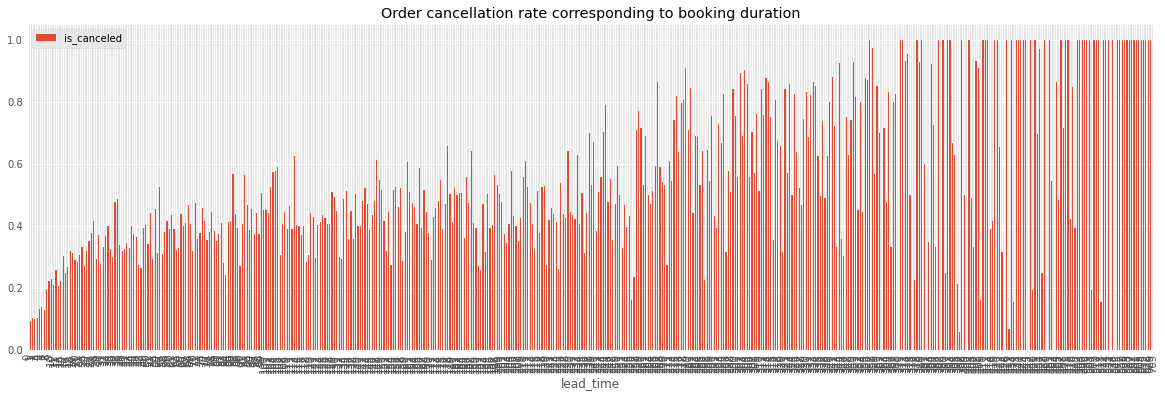

In [123]:
# 预订时长对应的订单取消率
grouped_df_lt = df.pivot_table(values='is_canceled',index='lead_time',aggfunc='mean')
# 可视化
fig, ax = plt.subplots(1, figsize=(18,6))
grouped_df_lt.plot(kind='bar', ax=ax, title='Order cancellation rate corresponding to booking duration')


由上图可知，预订时长越长，酒店订单被取消的概率显着增长。

8、成人、孩子、婴儿入住人数分布

<AxesSubplot:title={'center':'Cancellation rate for adult occupancy'}, xlabel='adults'>

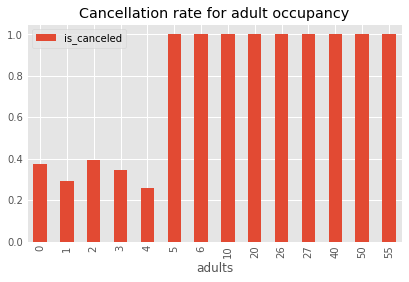

In [127]:
# 成人入住人数对应的订单取消率
grouped_df_a = df.pivot_table(values='is_canceled',index='adults',aggfunc='mean')
# 可视化
grouped_df_a.plot(kind='bar',title='Cancellation rate for adult occupancy')


由上图可知，成人入住人数在5及5以上的订单被取消概率极高。

<AxesSubplot:title={'center':'The number of children staying corresponds to the order quantity'}, xlabel='children'>

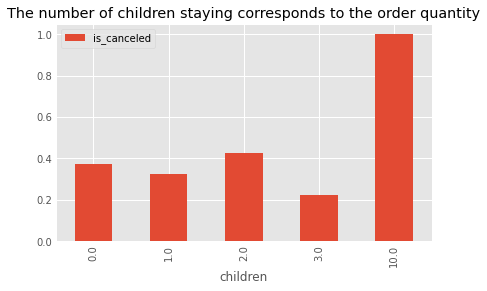

In [129]:
# 孩子入住人数对应订单量
grouped_df_copy_c  = df.pivot_table(values='is_canceled',index='children',aggfunc='mean')
# 可视化
grouped_df_copy_c.plot(kind='bar',title='The number of children staying corresponds to the order quantity')


由上图可知，孩子入住人数为10人的订单被取消概率极高。

<AxesSubplot:title={'center':'The number of infants staying corresponds to the order quantity'}, xlabel='babies'>

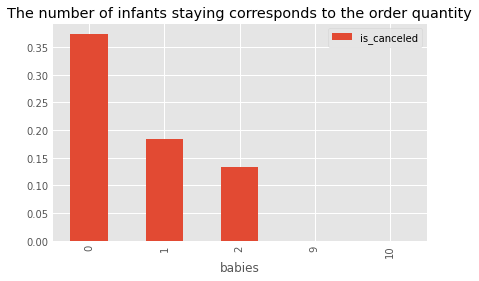

In [130]:
# 婴儿入住人数对应订单量
grouped_df_copy_b  = df.pivot_table(values='is_canceled', index='babies', aggfunc='mean')
# 可视化
grouped_df_copy_b.plot(kind='bar',title='The number of infants staying corresponds to the order quantity')


由上图可知，无婴儿入住的订单被取消的概率偏高。

市场细分及分销渠道分布

<AxesSubplot:title={'center':'Order volume by market segment'}, xlabel='market_segment'>

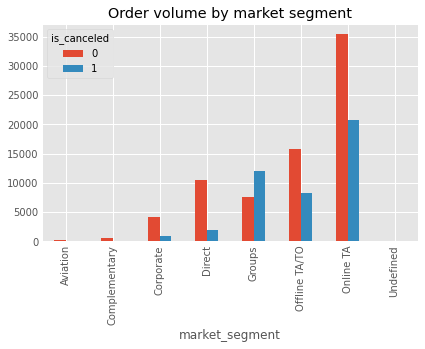

In [132]:
# 市场细分的订单量
grouped_df_ms = df.pivot_table(values='hotel',index='market_segment',columns='is_canceled',aggfunc='count')
# 可视化
grouped_df_ms.plot(kind='bar',title='Order volume by market segment')


根据上图可以看出，订单量按照市场细分后，其被取消的概率差异较大。

<AxesSubplot:title={'center':'Distribution channel order volume'}, xlabel='distribution_channel'>

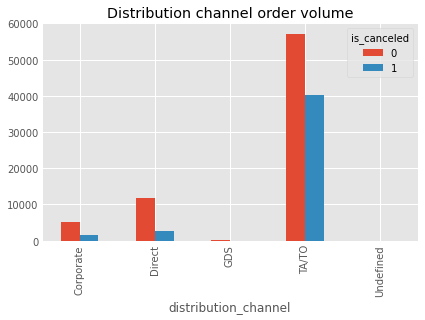

In [134]:
# 分销渠道的订单量
grouped_df_dc = df.pivot_table(values='hotel',index='distribution_channel',columns='is_canceled',aggfunc='count')
# 可视化
grouped_df_dc.plot(kind='bar',title='Distribution channel order volume')


根据上图可以看出，订单量按照分销渠道细分后，'TA/TO’渠道被取消的概率较大。

# 数据预处理

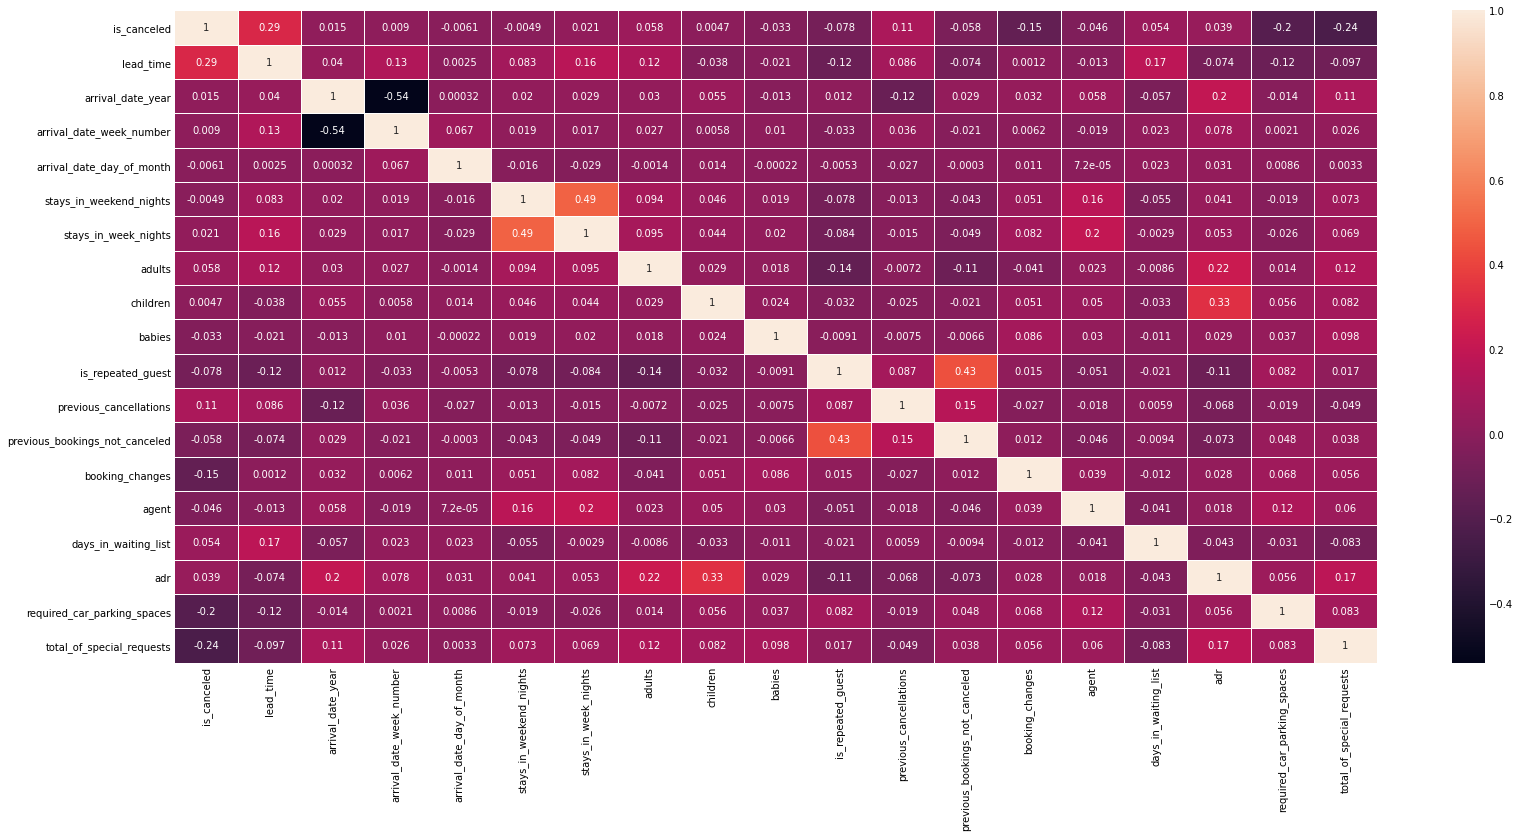

In [32]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()


In [33]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)     # 把和is_caceled这一列的所有相关系数大小求出来，
correlation

is_canceled                       1.000000
lead_time                         0.291515
total_of_special_requests         0.236165
required_car_parking_spaces       0.196804
booking_changes                   0.145198
previous_cancellations            0.109974
is_repeated_guest                 0.077791
adults                            0.057575
previous_bookings_not_canceled    0.057541
days_in_waiting_list              0.053941
agent                             0.046315
adr                               0.039368
babies                            0.032672
stays_in_week_nights              0.020703
arrival_date_year                 0.015438
arrival_date_week_number          0.009019
arrival_date_day_of_month         0.006108
stays_in_weekend_nights           0.004859
children                          0.004678
Name: is_canceled, dtype: float64

In [34]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [35]:
# 删除那些没有用的列
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [36]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,No Deposit,0.0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,No Deposit,304.0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,240.0,Transient,98.0,0,1,2015-07-03
5,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,240.0,Transient,98.0,0,1,2015-07-03
6,Resort Hotel,0,0,July,27,1,0,2,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,0.0,Transient,107.0,0,0,2015-07-03


In [37]:
# 非数值型的特征进行编码

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [38]:
cat_df = df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03
5,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03
6,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-03


In [39]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [40]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [41]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3
5,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3
6,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,3


In [42]:
# 打印出每个列的不同取值
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['A' 'C' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 2  3  6 22 23  5  7  1  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [43]:
# 对这些字符型特征进行编码

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [44]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3
5,0,0,2,2,1,0,0,0,7,3
6,0,0,0,0,0,0,0,0,7,3


In [45]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,98.00,0,1
5,14,27,1,0,2,2,0.0,0,0,0,0,240.0,98.00,0,1
6,0,27,1,0,2,2,0.0,0,0,0,0,0.0,107.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,104.40,0,0


In [46]:
num_df.var()

lead_time                         11430.928201
arrival_date_week_number            184.670443
arrival_date_day_of_month            77.127519
stays_in_weekend_nights               0.990944
stays_in_week_nights                  3.584426
adults                                0.331133
children                              0.159296
babies                                0.009518
is_repeated_guest                     0.028641
previous_cancellations                0.717701
previous_bookings_not_canceled        2.252098
agent                             11473.023410
adr                                2500.554200
required_car_parking_spaces           0.060389
total_of_special_requests             0.629295
dtype: float64

In [47]:
# 标准化数值变量

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [48]:
num_df.var()

lead_time                         2.554281
arrival_date_week_number          0.440133
arrival_date_day_of_month         0.506521
stays_in_weekend_nights           0.990944
stays_in_week_nights              3.584426
adults                            0.331133
children                          0.159296
babies                            0.009518
is_repeated_guest                 0.028641
previous_cancellations            0.717701
previous_bookings_not_canceled    2.252098
agent                             3.526291
adr                               0.408393
required_car_parking_spaces       0.060389
total_of_special_requests         0.629295
dtype: float64

In [49]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [50]:
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0.000000,4.330733,0,0
3,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.720312,4.330733,0,0
4,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.484797,4.595120,0,1
5,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.484797,4.595120,0,1
6,0.000000,3.332205,0.693147,0,2,2,0.0,0,0,0,0,0.000000,4.682131,0,0


In [51]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [52]:
X.shape, y.shape

((118565, 25), (118565,))

In [53]:
# 切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [54]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
57261,1,0,2,2,2,0,0,2,9,2,4.718499,3.688879,3.135494,0,2,3,0.0,0,0,0,0,2.302585,5.131672,0,1
114005,1,0,0,0,1,0,0,3,6,16,3.806662,3.218876,2.484907,2,3,2,0.0,0,0,0,0,2.708050,4.691348,0,0
3216,0,0,1,1,1,0,2,0,11,22,4.369448,3.871201,3.091042,0,1,2,0.0,0,0,0,0,0.000000,3.496508,0,0
67711,1,0,5,2,1,3,0,2,12,9,5.093750,2.944439,1.945910,2,1,1,0.0,0,0,0,0,1.386294,4.394449,0,0
80288,1,0,3,2,1,3,0,0,11,16,3.526361,3.931826,2.302585,0,2,2,0.0,0,0,1,0,3.806662,4.709530,0,0


In [55]:
X_test.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
23311,0,0,3,2,2,0,0,2,4,22,3.871201,2.890372,2.890372,2,3,1,0.0,0,0,0,0,5.752573,3.980803,0,0
107927,1,3,2,2,1,0,0,3,3,20,4.043051,2.484907,2.833213,1,3,1,0.0,0,0,0,0,2.302585,4.328098,0,3
9586,0,2,2,2,1,0,0,2,11,21,4.465908,3.951244,2.890372,0,1,2,0.0,0,0,0,0,5.484797,4.186620,0,2
71870,1,0,2,2,1,0,0,2,8,15,5.814131,3.367296,2.708050,2,2,2,1.0,0,0,0,0,2.302585,4.763028,0,0
36507,0,0,3,2,2,0,2,3,5,23,4.779123,3.091042,3.135494,1,0,2,0.0,0,0,0,0,5.529429,4.143135,0,0


In [56]:
y_train.head(), y_test.head()

(57261     1
 114005    0
 3216      0
 67711     1
 80288     1
 Name: is_canceled, dtype: int64,
 23311     0
 107927    0
 9586      1
 71870     1
 36507     0
 Name: is_canceled, dtype: int64)

# 构建模型

## Logistic Regression

In [57]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8094180489176273
Confusion Matrix : 
[[21066  1183]
 [ 5596  7725]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     22249
           1       0.87      0.58      0.70     13321

    accuracy                           0.81     35570
   macro avg       0.83      0.76      0.78     35570
weighted avg       0.82      0.81      0.80     35570



## KNN

In [58]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.891312904132696
Confusion Matrix : 
[[21418   831]
 [ 3035 10286]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     22249
           1       0.93      0.77      0.84     13321

    accuracy                           0.89     35570
   macro avg       0.90      0.87      0.88     35570
weighted avg       0.89      0.89      0.89     35570



## Decision Tree Classifier

In [59]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9481023334270453
Confusion Matrix : 
[[21351   898]
 [  948 12373]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22249
           1       0.93      0.93      0.93     13321

    accuracy                           0.95     35570
   macro avg       0.94      0.94      0.94     35570
weighted avg       0.95      0.95      0.95     35570



## Random Forest Classifier

In [60]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9529659825695811
Confusion Matrix : 
[[22041   208]
 [ 1465 11856]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22249
           1       0.98      0.89      0.93     13321

    accuracy                           0.95     35570
   macro avg       0.96      0.94      0.95     35570
weighted avg       0.95      0.95      0.95     35570



## Ada Boost Classifier

In [61]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9483553556367725
Confusion Matrix : 
[[21338   911]
 [  926 12395]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22249
           1       0.93      0.93      0.93     13321

    accuracy                           0.95     35570
   macro avg       0.94      0.94      0.94     35570
weighted avg       0.95      0.95      0.95     35570



## Gradient Boosting Classifier

In [62]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9105425920719707
Confusion Matrix : 
[[22041   208]
 [ 2974 10347]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     22249
           1       0.98      0.78      0.87     13321

    accuracy                           0.91     35570
   macro avg       0.93      0.88      0.90     35570
weighted avg       0.92      0.91      0.91     35570



## XgBoost Classifier

In [63]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

[11:11:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score of Ada Boost Classifier is : 0.9847624402586449
Confusion Matrix : 
[[22239    10]
 [  532 12789]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     22249
           1       1.00      0.96      0.98     13321

    accuracy                           0.98     35570
   macro avg       0.99      0.98      0.98     35570
weighted avg       0.99      0.98      0.98     35570



## Cat Boost Classifier

In [64]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.5
0:	learn: 0.4748099	total: 81.4ms	remaining: 8.06s
1:	learn: 0.4099085	total: 103ms	remaining: 5.07s
2:	learn: 0.3694428	total: 123ms	remaining: 3.98s
3:	learn: 0.3277686	total: 146ms	remaining: 3.52s
4:	learn: 0.2721198	total: 167ms	remaining: 3.18s
5:	learn: 0.2429397	total: 190ms	remaining: 2.98s
6:	learn: 0.2313158	total: 212ms	remaining: 2.81s
7:	learn: 0.2198451	total: 232ms	remaining: 2.67s
8:	learn: 0.2029275	total: 254ms	remaining: 2.56s
9:	learn: 0.1783352	total: 276ms	remaining: 2.48s
10:	learn: 0.1648167	total: 298ms	remaining: 2.41s
11:	learn: 0.1570463	total: 318ms	remaining: 2.33s
12:	learn: 0.1478155	total: 342ms	remaining: 2.29s
13:	learn: 0.1444008	total: 362ms	remaining: 2.22s
14:	learn: 0.1361455	total: 383ms	remaining: 2.17s
15:	learn: 0.1256325	total: 405ms	remaining: 2.13s
16:	learn: 0.1171838	total: 428ms	remaining: 2.09s
17:	learn: 0.1153646	total: 448ms	remaining: 2.04s
18:	learn: 0.1066115	total: 471ms	remaining: 2.01s
19:	learn: 0.10

In [65]:
print(f"Accuracy Score of Ada Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.996513916221535
Confusion Matrix : 
[[22236    13]
 [  111 13210]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22249
           1       1.00      0.99      1.00     13321

    accuracy                           1.00     35570
   macro avg       1.00      1.00      1.00     35570
weighted avg       1.00      1.00      1.00     35570



## Extra Trees Classifier

In [66]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred_etc = etc.predict(X_test)

acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clf_report = classification_report(y_test, y_pred_etc)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_etc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.94900196795052
Confusion Matrix : 
[[21996   253]
 [ 1561 11760]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     22249
           1       0.98      0.88      0.93     13321

    accuracy                           0.95     35570
   macro avg       0.96      0.94      0.94     35570
weighted avg       0.95      0.95      0.95     35570



LGBM Classifier

In [67]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
clf_report = classification_report(y_test, y_pred_lgbm)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_lgbm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9475962890075906
Confusion Matrix : 
[[21390   859]
 [ 1005 12316]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22249
           1       0.93      0.92      0.93     13321

    accuracy                           0.95     35570
   macro avg       0.94      0.94      0.94     35570
weighted avg       0.95      0.95      0.95     35570



## Voting Classifier

In [68]:
classifiers = [('Gradient Boosting Classifier', gb), ('Cat Boost Classifier', cat), ('XGboost', xgb),  ('Decision Tree', dtc),
               ('Extra Tree', etc), ('Light Gradient', lgbm), ('Random Forest', rd_clf), ('Ada Boost', ada), ('Logistic', lr),
               ('Knn', knn)]
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.4748099	total: 21.9ms	remaining: 2.17s
1:	learn: 0.4099085	total: 48.3ms	remaining: 2.37s
2:	learn: 0.3694428	total: 69.9ms	remaining: 2.26s
3:	learn: 0.3277686	total: 93ms	remaining: 2.23s
4:	learn: 0.2721198	total: 119ms	remaining: 2.25s
5:	learn: 0.2429397	total: 150ms	remaining: 2.35s
6:	learn: 0.2313158	total: 183ms	remaining: 2.43s
7:	learn: 0.2198451	total: 216ms	remaining: 2.49s
8:	learn: 0.2029275	total: 238ms	remaining: 2.41s
9:	learn: 0.1783352	total: 259ms	remaining: 2.33s
10:	learn: 0.1648167	total: 280ms	remaining: 2.26s
11:	learn: 0.1570463	total: 299ms	remaining: 2.19s
12:	learn: 0.1478155	total: 320ms	remaining: 2.14s
13:	learn: 0.1444008	total: 340ms	remaining: 2.09s
14:	learn: 0.1361455	total: 360ms	remaining: 2.04s
15:	learn: 0.1256325	total: 382ms	remaining: 2.01s
16:	learn: 0.1171838	total: 405ms	remaining: 1.98s
17:	learn: 0.1153646	total: 428ms	remaining: 1.95s
18:	learn: 0.1066115	total: 451ms	remaining: 1.92s
19:	learn: 0.1

VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier()),
                             ('Cat Boost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x7accedefdf90>),
                             ('XGboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='...
                                            tree_method='exact',
                                            validate_parameters=1,
                                            verbosity=None)),
                             ('Decision Tree', DecisionTreeClass

In [69]:
y_pred_vc = vc.predict(X_test)

acc_vtc = accuracy_score(y_test, y_pred_vc)
conf = confusion_matrix(y_test, y_pred_vc)
clf_report = classification_report(y_test, y_pred_vc)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_vtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9634804610626932
Confusion Matrix : 
[[22227    22]
 [ 1277 12044]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     22249
           1       1.00      0.90      0.95     13321

    accuracy                           0.96     35570
   macro avg       0.97      0.95      0.96     35570
weighted avg       0.97      0.96      0.96     35570



## 模型对比

从图中可以看出，准确率竟然高达99.7%

In [70]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb, acc_xgb, acc_cat, acc_etc, acc_lgbm, acc_vtc]
})


models.sort_values(by = 'Score', ascending = False)
                   
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

In [71]:
y_train

57261     1
114005    0
3216      0
67711     1
80288     1
         ..
33096     0
67427     1
93939     0
71459     1
49195     1
Name: is_canceled, Length: 82995, dtype: int64

[11:15:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.5
0:	learn: 0.4748099	total: 22.4ms	remaining: 2.22s
1:	learn: 0.4099085	total: 44ms	remaining: 2.15s
2:	learn: 0.3694428	total: 63.6ms	remaining: 2.06s
3:	learn: 0.3277686	total: 87.6ms	remaining: 2.1s
4:	learn: 0.2721198	total: 108ms	remaining: 2.05s
5:	learn: 0.2429397	total: 128ms	remaining: 2.01s
6:	learn: 0.2313158	total: 148ms	remaining: 1.97s
7:	learn: 0.2198451	total: 169ms	remaining: 1.95s
8:	learn: 0.2029275	total: 191ms	remaining: 1.93s
9:	learn: 0.1783352	total: 215ms	remaining: 1.94s
10:	learn: 0.1648167	total: 236ms	remaining: 1.91s
11:	learn: 0.1570463	total: 255ms	remaining: 1.87s
12:	learn: 0.1478155	total: 277ms	remaining: 1.85s
13:	learn: 0.1444008	total: 296ms	remaining: 1.82s
14:	learn: 0.13614

AttributeError: predict_proba is not available when voting='hard'

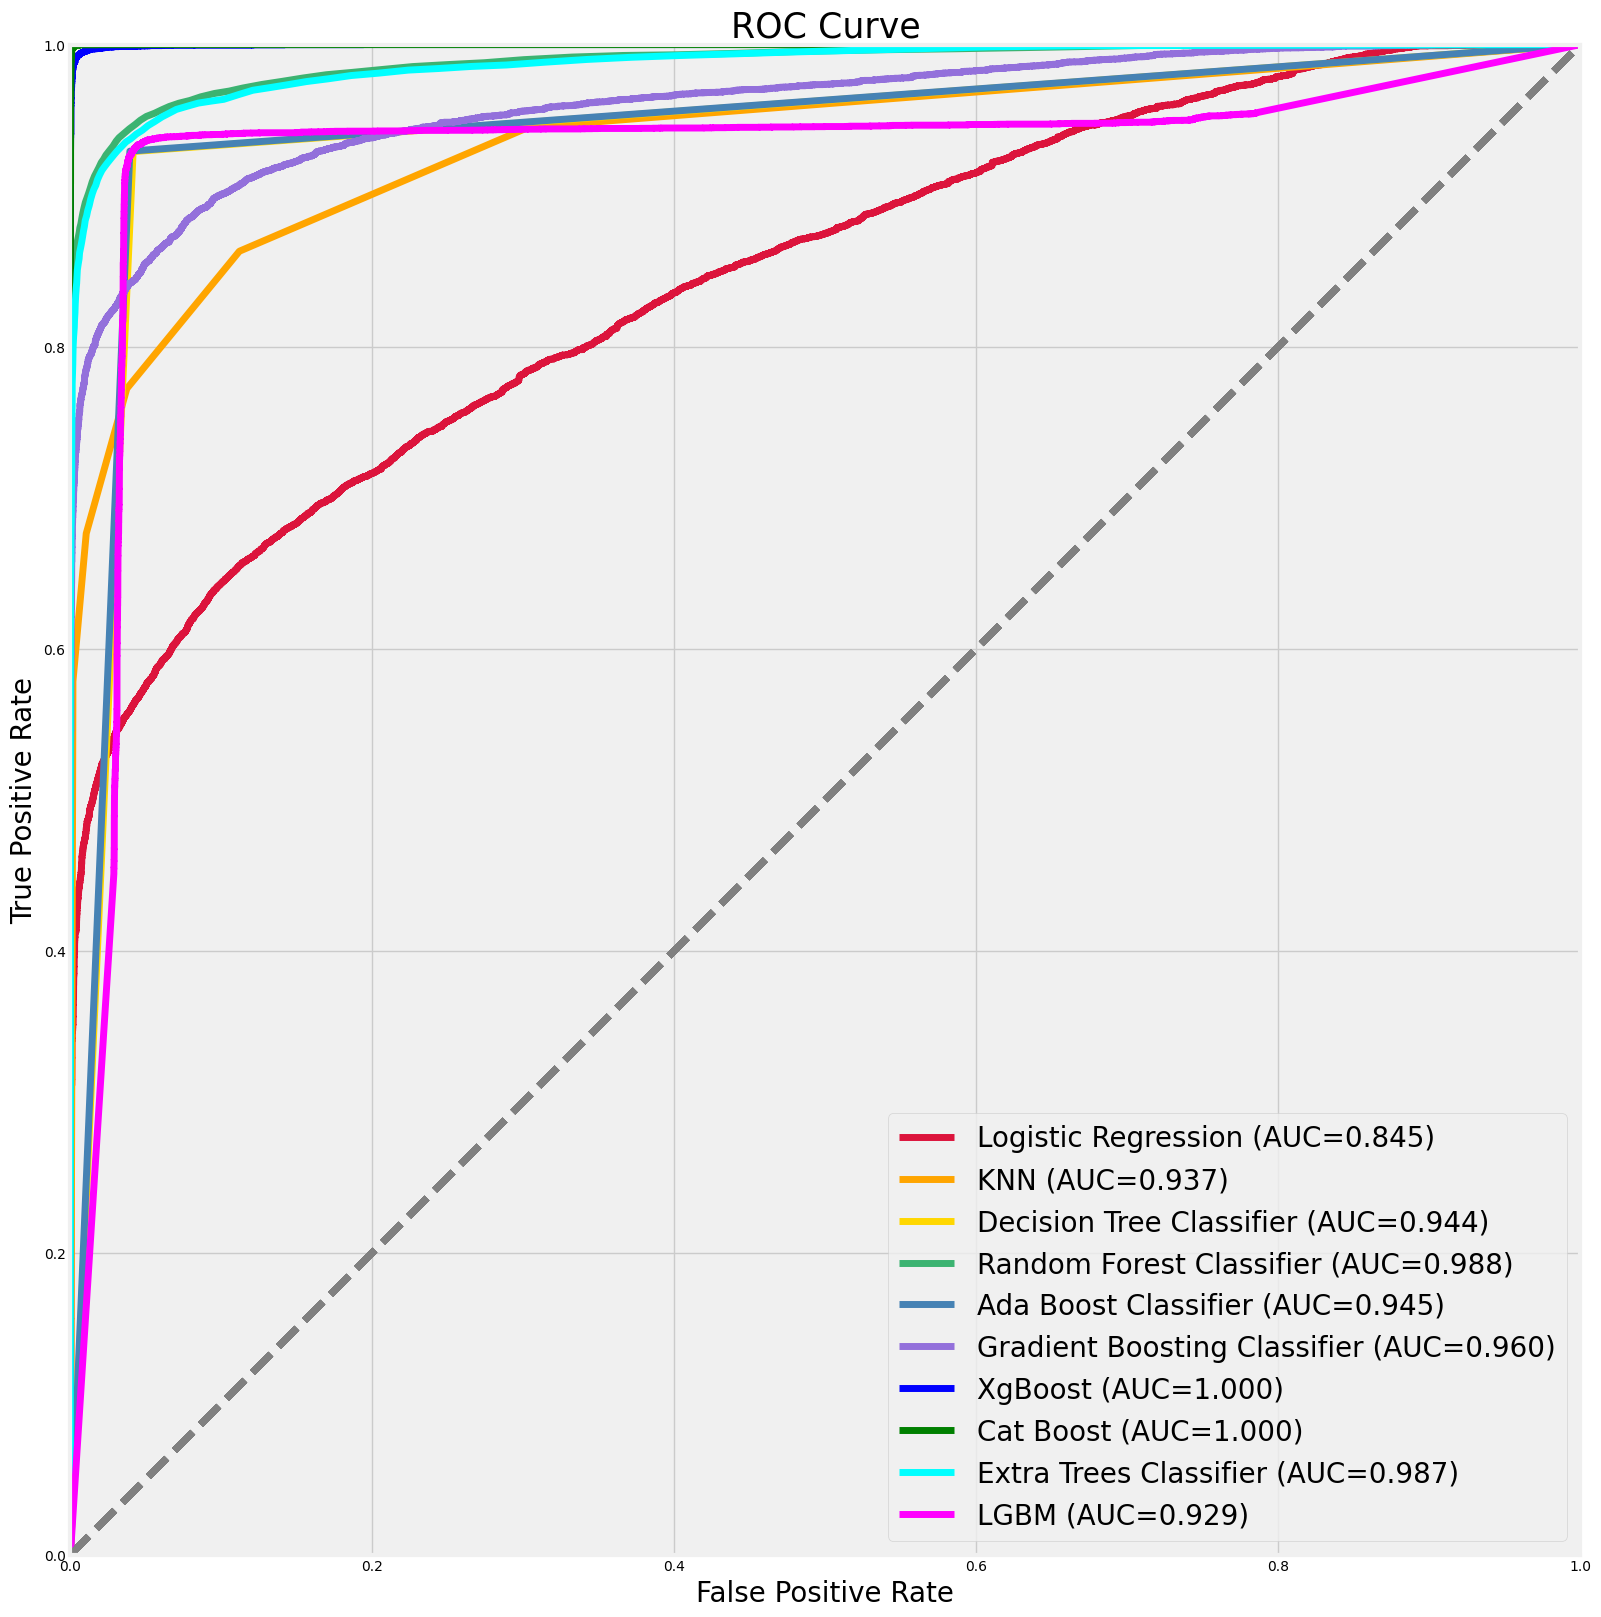

In [72]:
from sklearn.metrics import roc_curve,auc

names = ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier']

sampling_methods = [lr,knn,dtc,rd_clf,ada,gb,xgb,cat,etc,lgbm,vc]

colors = ['crimson',
          'orange',
          'gold',
          'mediumseagreen',
          'steelblue', 
          'mediumpurple',
          'blue',
          'green',
          'cyan',
          'magenta',
          'yellow'
         ]

def multi_models_roc(names, sampling_methods, colors, X_test, y_test, save=True, dpin=100):
    """
    将多个机器模型的roc图输出到一张图上
    Args:
        names: list, 多个模型的名称
        sampling_methods: list, 多个模型的实例化对象
        save: 选择是否将结果保存（默认为png格式）
    Returns:
        返回图片对象plt
    """
    plt.figure(figsize=(20, 20), dpi=dpin)

    for (name, method, colorname) in zip(names, sampling_methods, colors):

        method.fit(X_train, y_train)
        y_test_preds = method.predict(X_test)
        y_test_predprob = method.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)

        plt.plot(fpr, tpr, lw=5, label='{} (AUC={:.3f})'.format(name, auc(fpr, tpr)),color = colorname)
        plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
        plt.axis('square')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.xlabel('False Positive Rate',fontsize=20)
        plt.ylabel('True Positive Rate',fontsize=20)
        plt.title('ROC Curve',fontsize=25)
        plt.legend(loc='lower right',fontsize=20)
    if save:
        plt.savefig('multi_models_roc.png')
    return plt
#ROC曲线
train_roc_graph = multi_models_roc(names, sampling_methods, colors, X_test, y_test, save = False)
train_roc_graph.show()
# train_roc_graph.savefig('ROC_Train_all.png')